In [3]:
import sys
sys.path.append('../tgl')
import os
os.chdir('../tgl')

In [9]:
from model import TemporalGraphModel

In [10]:
import numpy as np

tgm = TemporalGraphModel('LICHESS', 'config/TGN.yml', 'models/LICHESS_2013-02.pkl')
node_count = tgm.node_count()
all_nodes = np.arange(0, node_count, dtype = int)
ts = np.repeat(tgm.timestamps().max(), len(all_nodes))

In [14]:
emb = tgm.get_node_emb(all_nodes, ts)
emb

tensor([[ 2.9240, -0.6090, -0.6017,  ..., -0.6145, -0.5752, -0.5453],
        [-0.4795, -0.4863, -0.4741,  ..., -0.4858, -0.4530, -0.4244],
        [-0.4435, -0.4500, -0.4362,  ..., -0.4476, -0.4167, -0.3886],
        ...,
        [-0.5209,  0.2350, -0.5176,  ...,  0.0175,  0.5307, -0.2397],
        [-0.5073,  0.2608, -0.5033,  ..., -0.5152, -0.4810, -0.4521],
        [-0.5167,  1.0421, -0.5132,  ..., -0.2523, -0.4905, -0.4615]])

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca

PCA(n_components=2)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [15]:
pca.fit(emb)
emb_pca = pca.transform(emb)
emb_pca.shape

(4977, 2)

In [32]:
import pickle

stats = []

with open('./DATA/LICHESS/stats.pkl', 'rb') as f:
    stats = pickle.load(f)

elo = list(map(lambda d: d['elo'], stats))
elo = np.asarray(elo[:-1])
elo_norm = (elo-np.min(elo[elo != 0]))/(np.max(elo)-np.min(elo[elo != 0]))
elo_norm

array([-0.16713206, -0.18934002, -0.20284796, ..., -0.2669534 ,
       -0.18796633, -0.19140055])

In [42]:
match_count = list(map(lambda d: d['matches'], stats))
match_count = np.asarray(match_count[:-1])
match_count

array([283,  27,  83, ...,   4,   2,   1])

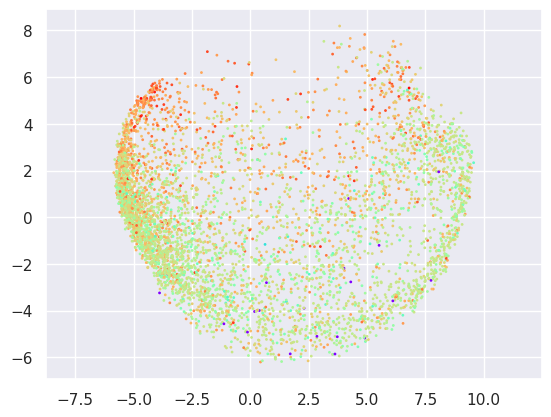

In [48]:
plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=elo_norm, s=1, cmap='rainbow')
plt.axis('equal');

/tmp/ipykernel_500/2529056314.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=np.log(match_count), s=1, cmap='rainbow')


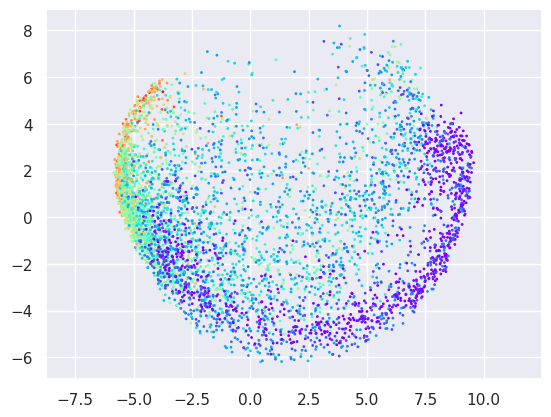

In [45]:
plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=np.log(match_count), s=1, cmap='rainbow')
plt.axis('equal');

In [24]:
from sklearn.manifold import TSNE

emb_tsne = TSNE(n_components=2, learning_rate='auto',
                init='random', perplexity=30).fit_transform(emb)
emb_tsne.shape

(4977, 2)

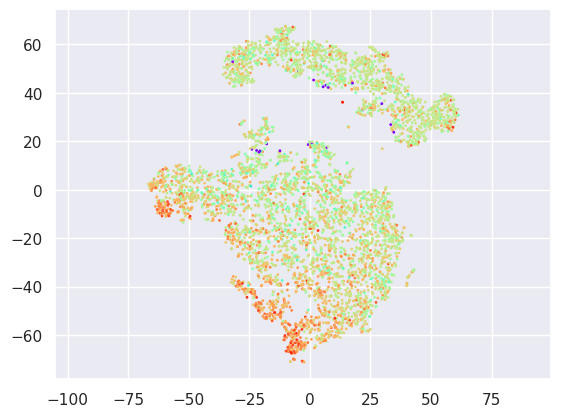

In [40]:
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=elo_norm, s = 1, cmap='rainbow')
plt.axis('equal');

/tmp/ipykernel_500/3609409407.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=np.log(match_count), s = 1, cmap='rainbow')


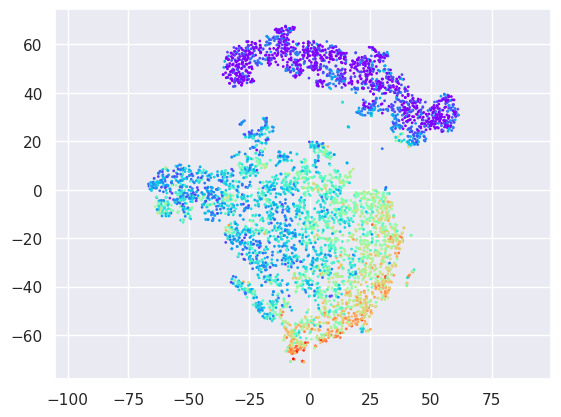

In [46]:
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=np.log(match_count), s = 1, cmap='rainbow')
plt.axis('equal');